# Predict Defaulter customers

### Problem Statement:
Make a model that can be used to predict customer defalter on his EMI payment

### Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import timeit

### Loading the data

In [2]:
data = pd.read_csv('Train.csv')

C:\Users\91882\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (746,835) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


### Knowing the data

In [4]:
data.shape

(17521, 2395)

In [5]:
data.describe()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
count,17521.000000,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,...,17521.000000,17521.000000,17521.000000,17521.000000,16347.000000,16347.000000,16335.000000,16347.00000,16347.000000,16335.000000
mean,0.100508,3.158967e+04,2.046540e+04,2.502937e+04,2.789385e+04,2.597734e+04,3.302600e+04,2.912693e+04,2.971069e+04,3.617392e+04,...,0.736202,0.595343,0.773757,0.639005,55.540038,55.015416,35.180961,17.99584,17.539977,10.359657
std,0.300685,7.612897e+05,7.136908e+05,6.018207e+05,6.091245e+05,7.211998e+05,7.488433e+05,2.175595e+05,2.981508e+05,2.612427e+05,...,0.910828,0.784953,0.921805,0.806286,53.269618,52.697069,34.956016,24.83891,24.685954,18.476447
min,0.000000,-8.555719e+07,-8.555719e+07,-7.011955e+07,-7.100920e+07,-8.480658e+07,-9.016250e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.742337e+03,2.007863e+03,1.857013e+03,2.562647e+03,2.973188e+03,3.822170e+03,1.824148e+03,1.787456e+03,3.505288e+03,...,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000,12.000000,9.00000,9.000000,5.000000
50%,0.000000,9.308060e+03,6.642857e+03,6.236503e+03,8.464355e+03,1.036962e+04,1.303534e+04,5.705458e+03,5.536147e+03,8.832639e+03,...,0.000000,0.000000,0.000000,0.000000,42.000000,42.000000,27.000000,13.00000,13.000000,7.000000
75%,0.000000,3.053873e+04,2.156093e+04,2.068154e+04,2.773849e+04,2.645998e+04,3.359204e+04,1.852222e+04,1.753976e+04,2.341911e+04,...,1.000000,1.000000,1.000000,1.000000,74.000000,73.000000,47.000000,21.00000,21.000000,12.000000
max,1.000000,1.459355e+07,1.288980e+07,1.478068e+07,1.178075e+07,1.879882e+07,1.514035e+07,1.125630e+07,2.788633e+07,1.314762e+07,...,4.000000,4.000000,4.000000,4.000000,1305.000000,1305.000000,1211.000000,2205.00000,2205.000000,1831.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2395 entries, Col1 to Col2397
dtypes: float64(844), int64(1548), object(3)
memory usage: 320.2+ MB


In [7]:
data_dtype = pd.DataFrame(data.dtypes)
data_dtype

,0
Col1,object
Col2,int64
Col3,float64
Col4,float64
Col5,float64
...,...
Col2393,float64
Col2394,float64
Col2395,float64
Col2396,float64


### Cleaning and preparing the data

In [8]:
data_dtype.loc[data_dtype[0]=='object'] 

,0
Col1,object
Col747,object
Col836,object


In [9]:
data['Col747'].notnull().any()

True

In [10]:
data['Col747'].value_counts()
data.Col747.replace(to_replace = '-', value = np.nan, inplace = True)
data['Col747'].fillna(0, inplace = True)

In [11]:
data['Col836'].value_counts()
data['Col836'].fillna(0, inplace = True)

In [12]:
data.replace(to_replace = '-', value = np.nan, inplace = True)

In [13]:
data.Col836.replace(to_replace = '-', value = np.nan, inplace = True)

In [14]:
data_dtype[0].value_counts()

int64      1548
float64     844
object        3
Name: 0, dtype: int64

In [15]:
data['Col1'] = data['Col1'].astype(str)

In [16]:
data['Col747'] = data['Col747'].astype('float64')

In [17]:
data['Col836'] = data['Col836'].astype('float64')

In [18]:
data.isnull().any()

Col1       False
Col2       False
Col3       False
Col4       False
Col5       False
           ...  
Col2393     True
Col2394     True
Col2395     True
Col2396     True
Col2397     True
Length: 2395, dtype: bool

In [19]:
data.fillna(data.mean(), inplace=True)

In [20]:
data.isnull().any()

Col1       False
Col2       False
Col3       False
Col4       False
Col5       False
           ...  
Col2393    False
Col2394    False
Col2395    False
Col2396    False
Col2397    False
Length: 2395, dtype: bool

###  Check for duplicated data- rows and columns

In [21]:
data.duplicated(subset = 'Col1', keep = 'first').any() #Since the name column has no duplicated values, it is safe to assume that rows are not duplicated

False

In [22]:
data.shape[1]

2395

In [27]:
def GetDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


In [34]:
#dropped the duplicate columns
start = timeit.default_timer()
data = data.drop(columns =  GetDuplicateColumns(data))
stop = timeit.default_timer()
execution_time = stop - start
execution_time

6169.6631834

### Correlations and Visualizations

In [35]:
corr_matrix = data.corr()

In [36]:
# data.hist(bins = 50, figsize= (20,15))
# plt.show

In [37]:
corr_matrix['Col2'].sort_values(ascending = False)

Col2      1.000000
Col440    0.165821
Col636    0.159290
Col437    0.157594
Col243    0.157209
            ...   
Col910   -0.118270
Col14    -0.121277
Col15    -0.126069
Col13    -0.153077
Col724         NaN
Name: Col2, Length: 2265, dtype: float64

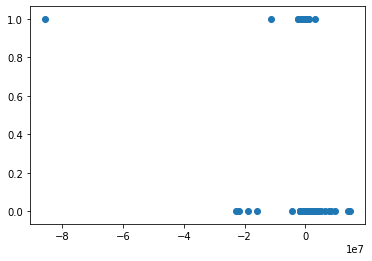

In [38]:
plt.scatter(data['Col3'], data['Col2'])

In [39]:
X = data.loc[: , 'Col3':'Col2397']
X

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,4.065539e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,3.262168e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,9.404683e+03,3.726288e+03,3.726288e+03,7.445963e+03,2.017008e+04,4.034016e+04,5.107963e+03,4.950751e+03,2.040694e+04,4.382332e+03,...,0,0,0,0,38.0,35.0,25.0,14.0,11.0,6.0
17517,6.563830e+04,1.910968e+04,1.761840e+04,3.523681e+04,4.639897e+03,1.422805e+04,4.775029e+04,6.006875e+04,1.032587e+04,1.513036e+04,...,1,0,1,0,155.0,145.0,90.0,31.0,21.0,12.0
17518,4.220941e+04,3.173771e+04,2.539017e+04,2.539017e+04,1.005050e+04,8.040400e+03,4.354578e+04,4.097184e+04,1.594774e+02,4.029443e+03,...,0,0,0,0,2.0,2.0,2.0,4.0,4.0,2.0
17519,7.048496e+04,9.814610e+04,9.814610e+04,1.080079e+05,1.317389e+05,1.359192e+05,5.724762e+04,5.605762e+04,7.384116e+04,7.898669e+04,...,0,1,0,1,35.0,34.0,11.0,10.0,9.0,4.0


In [40]:
Y = data.loc[:, 'Col2']
Y

0        1
1        0
2        0
3        0
4        0
        ..
17516    0
17517    0
17518    0
17519    0
17520    0
Name: Col2, Length: 17521, dtype: int64

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 10) #random_state method is used if we want our sample to remain same

In [42]:
Y.value_counts(normalize = True) 

0    0.899492
1    0.100508
Name: Col2, dtype: float64

In [43]:
Y_train.value_counts(normalize = True)

0    0.902611
1    0.097389
Name: Col2, dtype: float64

In [44]:
X_train #random samples chosen

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
7052,150.000000,79.284444,71.356000,118.926667,28.327778,42.491667,100.704524,102.456537,68.782825,80.589933,...,1,1,1,1,53.0,53.0,47.0,43.0,43.0,39.0
1033,36528.713330,12542.689170,12542.689170,25085.378330,9173.895833,18347.791670,17037.935880,16307.595490,15030.806920,16838.229610,...,2,0,2,0,62.0,62.0,41.0,21.0,21.0,14.0
10520,4335.343333,2704.451667,2318.101429,2704.451667,9805.941667,9805.941667,2023.796206,2023.796206,5231.279949,5231.279949,...,1,0,1,0,71.0,71.0,54.0,14.0,14.0,8.0
704,1901.650000,3391.165000,5134.860000,4985.806667,7089.781667,13817.501670,4972.800147,5313.547138,19047.016460,25187.215840,...,1,1,1,1,32.0,25.0,13.0,9.0,6.0,2.0
1707,89897.113330,32639.049170,32801.594170,65278.098330,38703.975830,77407.951670,37354.230750,25690.783990,47101.849950,37961.939230,...,1,2,1,2,39.0,39.0,28.0,21.0,21.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,587.826667,542.287778,488.059000,813.431667,4103.065556,6154.598333,556.949947,494.693333,4302.965180,3891.818889,...,1,1,1,1,79.0,79.0,47.0,15.0,15.0,7.0
10201,16647.343330,51394.685710,45113.495000,59960.466670,67664.194290,78941.560000,66662.556020,68343.636220,82400.818430,83851.916860,...,0,0,0,0,17.0,17.0,7.0,9.0,9.0,4.0
9372,7934.390000,4967.657500,4415.695556,6623.543333,10962.625000,14616.833330,4212.524081,3562.542193,11039.552090,10444.045190,...,1,2,1,2,73.0,73.0,36.0,12.0,12.0,7.0
7291,12621.793330,4954.782222,4459.304000,7432.173333,4896.421111,7344.631667,9538.170177,10865.159370,13227.183070,15635.070460,...,2,1,2,1,85.0,85.0,50.0,34.0,34.0,16.0


In [45]:
X = X.apply(pd.to_numeric)

#### Logistic regression

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X_train, Y_train)

C:\Users\91882\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
model.score(X_test, Y_test) #89% accurate

0.887018544935806

In [52]:
model.predict_proba(X_test)

array([[0.92344506, 0.07655494],
       [0.87733886, 0.12266114],
       [0.87690918, 0.12309082],
       ...,
       [0.68231914, 0.31768086],
       [0.90956092, 0.09043908],
       [0.86818583, 0.13181417]])